In [1]:
from __future__ import absolute_import, division, print_function
#for word encoding
import codecs
#regex
import glob
#concurrency
import multiprocessing
#dealing with operating system ie reading file
import os
#pretty printing, human read
import pprint
#regular expression
import re
#natural language toolkit
import nltk
#word2vec
import gensim.models.word2vec as w2v
#phrases
from gensim.models.phrases import Phrases, Phraser

#dimensionality reduction
import sklearn.manifold
#math
import numpy as np
#plotting
import matplotlib.pyplot as plt
#parse pandas as pd
import pandas as pd
#visualization
import seaborn as sns

In [2]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/rohit/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [2]:
#process our data
#clean data
nltk.download('punkt') #tokenizer pre trained
nltk.download('stopwords') #words like and, the, an, a, of

[nltk_data] Downloading package punkt to /home/rohit/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/rohit/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
#get book names
book_filenames = sorted(glob.glob("raw_corpus.txt"))
book_filenames

['raw_corpus.txt']

In [12]:
from nltk.corpus import stopwords
stop_words=stopwords.words('english')
stop_words[:]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [3]:
#get the book names, matching txt file
corpus_raw = u""
#for each txt, read and open in utf-8,
#add to raw corpus
for book_filename in book_filenames:
    print("Reading '{0}'...".format(book_filename))
    with codecs.open(book_filename, "r", "utf-8") as book_file:
        corpus_raw+= book_file.read()
    print("Corpus is now {0} characters long".format(len(corpus_raw)))
    print(corpus_raw[0:100])

Reading 'raw_corpus.txt'...
Corpus is now 8399266 characters long
print] Markedly Reduced Risk of Internal Malignancies in Patients With Vitiligo: A Nationwide Popula


In [7]:
type(corpus_raw)

str

In [115]:
#pickle is file format which loads as byte stream
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [116]:
raw_sentences = tokenizer.tokenize(corpus_raw)
print(raw_sentences[0])

print] Markedly Reduced Risk of Internal Malignancies in Patients With Vitiligo: A Nationwide Population-Based Cohort Study.


In [14]:
#convert into list of words
#remove unnecessary, split into words, no hyphens
#list of words
def sentence_to_wordlist(raw):
    #clean = re.sub("[^a-zA-z0-9-_']"," ", raw)
    clean = re.sub(r'\`|\~|\!|\@|\#|\$|\%|\^|\&|\*|\(|\)|\+|\=|\[|\{|\]|\}|\||\\|(?<![a-zA-Z0-9])\'|\<|\,(?!\d-)|\.|\>|\?|(?<![a-zA-Z0-9])\/|\"|\;|\:|\s|\b_+\b|^\d+$|(?<![-\/])\b(\d+)\b(?![-(,\d)])|≤|©|μ|λ|\bDOI|JCO\b|\bUniversity College\s\w+ Medicine\b|\b\s*[Cc]opyright\b|\bidoj\b|(?<=\s)-(?=\s)|\bgmail\b|\bAll rights reserved\b|±|(?<=\/)mL|µ|\b\d+-\d+\b|\b\/j\b',' ', raw)
  #without apostophe  #clean = re.sub(r'\`|\~|\!|\@|\#|\$|\%|\^|\&|\*|\(|\)|\+|\=|\[|\{|\]|\}|\||\\|\'|\<|\,|\.|\>|\?|\/|\"|\;|\:|\s|\b_+\b|^\d+$|(?<!-)\b(\d+)\b',' ', raw)
    words = clean.split()
    return words

In [15]:
#corpus_raw = corpus_raw.splitlines() #convert str into list of size 7074 split by new line (diff abs)
myWordTokens = []
for abstract in corpus_raw:
    myWordTokens.append(abstract.split(" ")) #split the string by space character to tokenize words
for i in range(len(myWordTokens)):  #makes all the tokens into lower case for lemmatization/stop-word to work properly.
    myWordTokens[i] = [word.lower() for word in myWordTokens[i]]
for i in range(len(myWordTokens)):
    myWordTokens[i] = [word for word in myWordTokens[i] if word not in stop_words] #remove the common stop words
for i in range(len(myWordTokens)):
    myWordTokens[i] = sentence_to_wordlist(' '.join(myWordTokens[i])) #  apply the regex to remove undesired characters

In [9]:
from nltk.corpus import wordnet as wn
from nltk import word_tokenize, pos_tag
from collections import defaultdict
from nltk.stem.wordnet import WordNetLemmatizer

tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

lmtzr = WordNetLemmatizer()

#text = "cars feet peoples is patients"
#tokens = word_tokenize(text)


for i in range(len(myWordTokens)):
    lemalst = []
    for token, tag in pos_tag(myWordTokens[i]):
        lemma = lmtzr.lemmatize(token, tag_map[tag[0]]) #lemma is a string
        lemalst.append(lemma)
    myWordTokens[i] = lemalst 

In [10]:
for i in range(len(myWordTokens)):
    myWordTokens[i] = [word for word in myWordTokens[i] if len(word) > 2] #removes single or double character elements

In [11]:
for i in range(len(myWordTokens)): #remove stop words again after doing Lemmatization
    myWordTokens[i] = [word for word in myWordTokens[i] if word not in stop_words]

In [12]:
myWordTokens[0]

['print',
 'markedly',
 'reduce',
 'risk',
 'internal',
 'malignancy',
 'patient',
 'vitiligo',
 'nationwide',
 'population-based',
 'cohort',
 'study',
 'bae',
 'chung',
 'yun',
 'kim',
 'park',
 'kim',
 'seo',
 'ahn',
 'lee',
 'kim',
 'park',
 'kim',
 'author',
 'information',
 "vincent's",
 'hospital',
 'college',
 'medicine',
 'catholic',
 'university',
 'korea',
 'seoul',
 'korea',
 'yonsei',
 'university',
 'college',
 'medicine',
 'seoul',
 'korea',
 'chonnam',
 'national',
 'university',
 'school',
 'medicine',
 'gwangju',
 'korea',
 'catholic',
 'kwandong',
 'university',
 'college',
 'medicine',
 'incheon',
 'korea',
 'dankook',
 'university',
 'college',
 'medicine',
 'cheonan',
 'korea',
 'hanyang',
 'university',
 'college',
 'medicine',
 'guri',
 'korea',
 'korea',
 'university',
 'college',
 'medicine',
 'seoul',
 'korea',
 'sungkyunkwan',
 'university',
 'school',
 'medicine',
 'seoul',
 'korea',
 'ajou',
 'university',
 'school',
 'medicine',
 'suwon',
 'korea',
 'gach

In [12]:
def check_int(s):
    if s[0] in ('-', '+'):
        return s[1:].isdigit()
    return s.isdigit()

In [13]:
#remove numbers
for i in range(len(myWordTokens)):
    myWordTokens[i] = [word for word in myWordTokens[i] if check_int(word) == False]

In [15]:
#remove words like doi, /,
for i in  range(len(myWordTokens)):
    myWordTokens[i] = [word for word in myWordTokens[i] if word not in ("doi", "/")]

In [56]:
myWordTokens[5990]

['generalize',
 'vitiligo',
 'erythroderma',
 'schwartz',
 'trotter',
 'report',
 '65-year-old',
 'black',
 'man',
 'whose',
 'onset',
 'erythroderma',
 'follow',
 'week',
 'generalize',
 'vitiligo',
 'etiology',
 'erythroderma',
 'unclear',
 'although',
 'prostate',
 'adenocarcinoma',
 'find',
 'evaluation',
 'knowledge',
 'first',
 'patient',
 'report',
 'vitiligo',
 'follow',
 'exfoliative',
 'dermatitis',
 'first',
 'report',
 'two',
 'uncommon',
 'marker',
 'internal',
 'malignancy',
 'erythroderma',
 'vitiligo',
 'occur',
 'prostate',
 'adenocarcinoma',
 'patient']

In [117]:
#sentence where each word is tokenized
sentences = []
for raw_sentence in raw_sentences:
    if(len(raw_sentence) > 0):
        sentences.append(sentence_to_wordlist(raw_sentence))

In [19]:
with open("tokenized_corpus.txt", "a") as token_file:
    for i in range(len(myWordTokens)):
        print(f""+" ".join(bigram[myWordTokens[i]]), file = token_file)

In [67]:
#print(bigram[sentences[123]])
flat_list = [item for sublist in bigram[myWordTokens] for item in sublist]
#print(len(flat_list))
with open("tokenized_corpus.txt", "a") as token_file:
    print(f""+" ".join(flat_list), file = token_file)

In [15]:
print(raw_sentences[87])
print(sentence_to_wordlist(raw_sentences[87]))

Radiation-induced morphea (RIM) is a rare complication of radiotherapy of unknown etiology.
['Radiation-induced', 'morphea', 'RIM', 'is', 'a', 'rare', 'complication', 'of', 'radiotherapy', 'of', 'unknown', 'etiology']


In [124]:
len(myWordTokens)

7074

In [16]:
phrases = Phrases(myWordTokens, min_count = 10, threshold = 20)

In [62]:
phrases_for_trigram = Phrases(bigram[myWordTokens], min_count = 10, threshold = 20)

In [17]:
bigram = Phraser(phrases)
print(bigram[myWordTokens[67]])

['insight', 'role', 'endoplasmic_reticulum', 'stress', 'skin', 'function', 'associate', 'disease', 'park_lee', 'shin', 'uchida', 'author_information', 'department', 'food', 'science', 'nutrition', 'convergence', 'program', 'material', 'science', 'medicine', 'pharmaceutic', 'hallym', 'university', 'chuncheon', 'korea', 'department_dermatology', 'cutaneous_biology', 'research_institute', 'yonsei_university', 'college_medicine', 'seoul_korea', 'department_dermatology', 'school_medicine', 'university_california', 'san_francisco', 'usa', 'northern', 'california', 'institute', 'research', 'education', 'veterans', 'affair', 'medical_center', 'san_francisco', 'usa', 'endoplasmic_reticulum', 'stress', 'mechanism', 'allow', 'protection', 'normal', 'cellular', 'function', 'response', 'internal', 'perturbation', 'accumulation', 'unfold', 'protein', 'external', 'perturbation', 'example', 'redox', 'stress', 'uvb_irradiation', 'infection', 'hallmark', 'stress', 'accumulation', 'misfolded', 'unfolded'

In [63]:
trigram = Phraser(phrases_for_trigram)
print(trigram[bigram[myWordTokens[67]]])

['insight', 'role', 'endoplasmic_reticulum', 'stress', 'skin', 'function', 'associate', 'disease', 'park_lee', 'shin', 'uchida', 'author_information_department', 'food', 'science', 'nutrition', 'convergence', 'program', 'material', 'science', 'medicine', 'pharmaceutic', 'hallym', 'university', 'chuncheon', 'korea', 'department_dermatology_cutaneous_biology', 'research_institute_yonsei_university', 'college_medicine_seoul_korea', 'department_dermatology', 'school_medicine_university_california', 'san_francisco_usa', 'northern', 'california', 'institute', 'research', 'education', 'veterans', 'affair', 'medical_center', 'san_francisco_usa', 'endoplasmic_reticulum', 'stress', 'mechanism', 'allow', 'protection', 'normal', 'cellular', 'function', 'response', 'internal', 'perturbation', 'accumulation', 'unfold', 'protein', 'external', 'perturbation', 'example', 'redox', 'stress', 'uvb_irradiation', 'infection', 'hallmark', 'stress', 'accumulation', 'misfolded', 'unfolded', 'protein', 'physiol

In [18]:
with open("allbigram_20_withregex_mincnt10_july5_doubleStopRmve.txt", "a") as text_file:
    for phrase, score in phrases.export_phrases(myWordTokens):
        print(f"\n"+phrase.decode("utf-8"), file=text_file)
#     print(f"Purchase Amount2: ", file=text_file)
# for phrase, score in phrases.export_phrases(sentences):
#     print(phrase)

In [64]:
with open("alltrigram_20_withregex_mincnt10_july4_doubleStopRmve.txt", "a") as text_file:
    for phrase, score in phrases_for_trigram.export_phrases(bigram[myWordTokens]):
        print(f"\n"+phrase.decode("utf-8"), file=text_file)
#     print(f"Purchase Amount2: ", file=text_file)
# for phrase, score in phrases.export_phrases(sentences):
#     print(phrase)

In [14]:
token_count = sum([len(sentence) for sentence in sentences])
print("The book corpus contains {0:,} tokens".format(token_count))

The book corpus contains 1,150,123 tokens


In [141]:
#get vectors
#3 main tasks that vectors help
#distance, similarity, ranking

#Dimensionality of the resulting word vectors.
#more dimension, more computationally expensive to train
#more dimension = more generalized
num_features = 300

#minimum word count threshold
min_word_count = 3

#number of threads to run in parallel.
#more workers, faster we train
num_workers = multiprocessing.cpu_count()

#Context window length.
context_size = 8

#Downsample setting for frequent words.
#num between 0-1e-5 is good for this
downsampling = 1e-3

#Seed for RNG, to make results  reporudiclbe
#for debugging
seed = 1

In [142]:
vitiligo2vec = w2v.Word2Vec(
    sg=1, # 1 = skipgram, 0 = CBOW
    seed=seed,
    workers=num_workers,
    size=num_features,
    min_count=min_word_count,
    window=context_size,
    sample=downsampling
)

In [143]:
vitiligo2vec.build_vocab(bigram[sentences])

In [144]:
print("Word2Vec vocabulary length:", len(vitiligo2vec.wv.vocab))

Word2Vec vocabulary length: 20755


In [146]:
vitiligo2vec.train(sentences, total_examples=vitiligo2vec.corpus_count, epochs=15)

(13151998, 17251845)

In [147]:
#save file for later use
if not os.path.exists("trainedRegExandBiGramThresh"):
    os.makedirs("trainedRegExandBiGramThresh")

In [148]:
vitiligo2vec.save(os.path.join("trainedRegExandBiGramThresh", "vitiligo2vec.w2v"))

In [4]:
vitiligo2vec = w2v.Word2Vec.load(os.path.join("trainedRegExandBiGramThresh", "vitiligo2vec.w2v"))

In [149]:
#compress the word vectors into 2d space and plot
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)

In [150]:
all_word_vectors_matrix = vitiligo2vec.wv.syn0

/home/rohit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  """Entry point for launching an IPython kernel.


In [151]:
all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)

In [152]:
#plot the picture
points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[vitiligo2vec.wv.vocab[word].index])
            for word in vitiligo2vec.wv.vocab
        ]
        
    ],
    columns=["word", "x", "y"]
)

In [153]:
points.head(10)

,word,x,y
0,Markedly,-6.017811,-12.143445
1,Reduced,2.469895,57.522152
2,Risk,-9.799665,-22.514137
3,of,14.446349,-16.642084
4,Internal,-12.314557,-54.410183
5,Malignancies,-9.954861,-22.255966
6,in,19.427364,-17.917761
7,Patients,-12.705043,-23.575233
8,With,-9.237469,-20.367863
9,Vitiligo,6.340428,-20.178572


In [154]:
sns.set_context("poster")

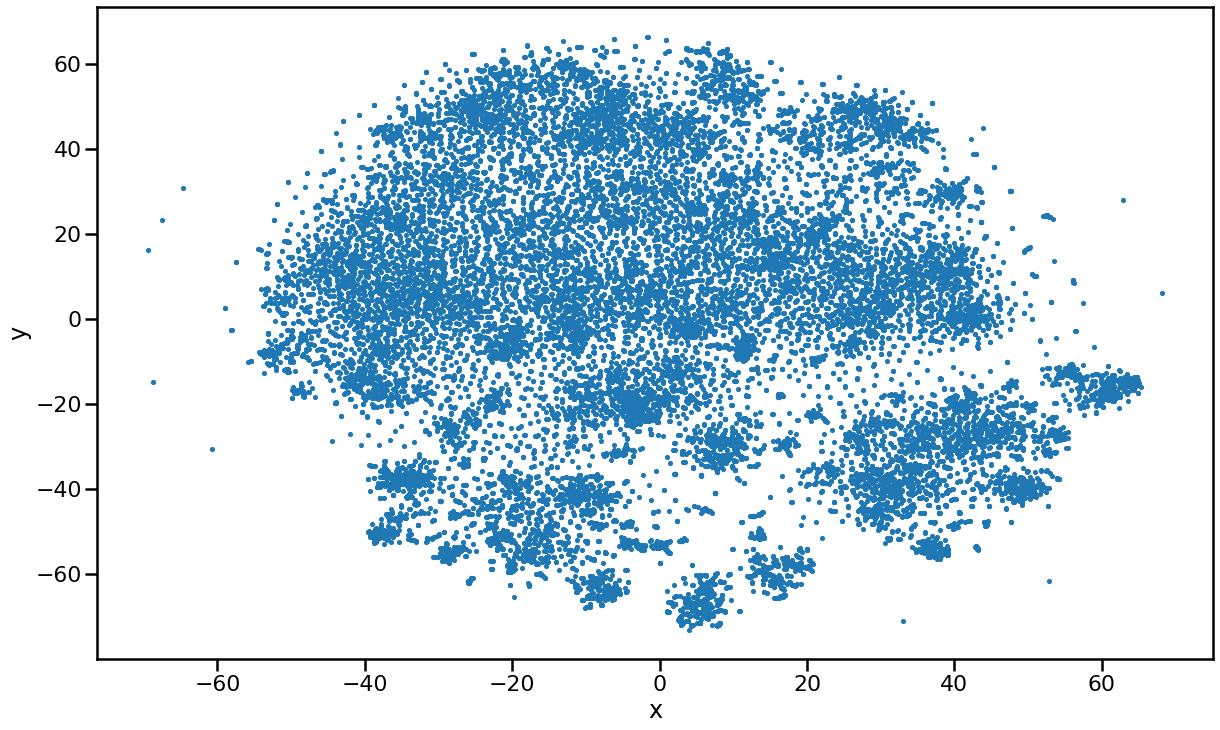

In [155]:
points.plot.scatter("x", "y", s=10, figsize=(20, 12))

In [156]:
def plot_region(x_bounds, y_bounds):
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) & 
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])
    ]
    
    ax = slice.plot.scatter("x", "y", s=35, figsize=(10, 8))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)

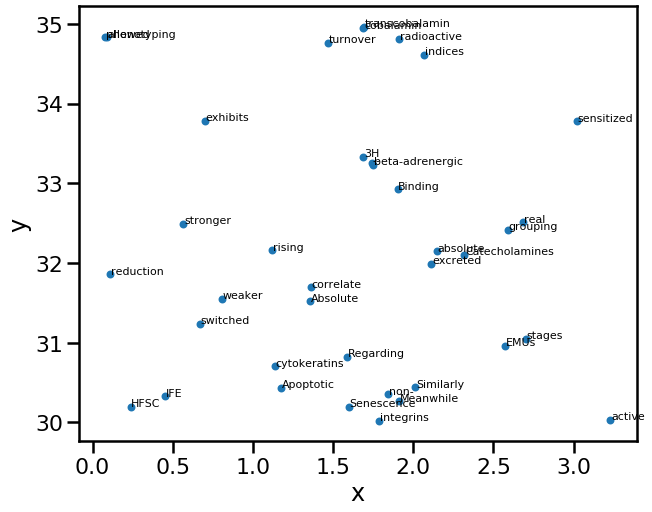

In [167]:
plot_region(x_bounds=(0, 3.5), y_bounds=(30, 35))

In [158]:
vitiligo2vec.most_similar("vitiligo")

/home/rohit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('non-familial', 0.5590035915374756),
 ('SSV', 0.5428386926651001),
 ('lip-tip', 0.5426547527313232),
 ('Forty-four', 0.5335401296615601),
 ('vitligo', 0.5282213687896729),
 ('nonsegmental-type', 0.5247111320495605),
 ('uncomplicated', 0.5220351815223694),
 ('acrofacialis', 0.517715334892273),
 ('intra-individual', 0.5113190412521362),
 ('nonvitiligo', 0.5104569792747498)]

In [15]:
#distance, similarity, and ranking
def nearest_similarity_cosmul(start1, end1, end2):
    similarities = vitiligo2vec.most_similar_cosmul(
        positive=[end2, start1],
        negative=[end1]
    )
    start2 = similarities[0][0]
    print("{start1} is related to {end1}, as {start2} is related to {end2}".format(**locals()))
    return start2

In [24]:
vitiligo2vec.wv.most_similar("")

[('generalized', 0.7030124068260193),
 ('nonsegmental', 0.688672661781311),
 ('moderate-to-severe', 0.6836977601051331),
 ('NSV', 0.6757471561431885),
 ('SSV', 0.6695462465286255),
 ('wherein', 0.6668614745140076),
 ('non-segmental', 0.6645103096961975),
 ('apparently', 0.6548138856887817),
 ('adolescence', 0.6544985771179199),
 ('localized', 0.6540524959564209)]

In [159]:
sumvec = vitiligo2vec.wv['vitiligo'] + vitiligo2vec.wv['gene']

In [160]:
vitiligo2vec.wv.most_similar("CAT")

[('-89A', 0.6718202829360962),
 ('389C', 0.6707252264022827),
 ('Catalase', 0.6556291580200195),
 ('419C', 0.6352038383483887),
 ('Asp-389', 0.6242661476135254),
 ('-262C', 0.6184980869293213),
 ('polymorphisms', 0.6128754615783691),
 ('MBL2', 0.609156608581543),
 ('Sicilian', 0.6076626777648926),
 ('FOXO3A', 0.605503261089325)]

In [161]:
vitiligo2vec.wv.similar_by_vector(sumvec)

[('gene', 0.9111143350601196),
 ('vitiligo', 0.6190493106842041),
 ('TAP', 0.5753928422927856),
 ('beta-defensin', 0.5742870569229126),
 ('PDGFRA', 0.5736822485923767),
 ('LMP', 0.5719020366668701),
 ('KIAA1005', 0.5710107088088989),
 ('UVRAG', 0.5677732825279236),
 ('PTSD', 0.5660277009010315),
 ('Promoter', 0.5623987913131714)]

In [166]:
vitiligo2vec.wv.most_similar("ACE")

[('angiotensin-converting', 0.6985723972320557),
 ('IL1-RN', 0.6923456192016602),
 ('Angiotensin', 0.6500903964042664),
 ('G-463A', 0.6453637480735779),
 ('insertion', 0.6318778395652771),
 ('GSTP1', 0.6248182058334351),
 ('converting', 0.6157151460647583),
 ('angiotensin', 0.6155979037284851),
 ('Enzyme', 0.6076146364212036),
 ('MCP-1', 0.6061190366744995)]